In [2]:
#Imports
import numpy as np 
import cv2
import glob
import os
import matplotlib.pyplot as plt
#from mlxtend.plotting import plot_decision_regions
#from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import svm

print(os.listdir("../input"))
dim = 100 # pixel dimension

['.DS_Store', 'Test', 'Training']


In [3]:
"""
fruits: array of selected fruits
data_type: "Training" or "Test"
label: overrides every label in the set
"""
def getYourFruits(fruits, data_type, label=None):
    images = []
    labels = []
    path = "../input/" + data_type + "/"
    
    for lbl, f in enumerate(fruits):
        p = path + f
        for image_path in glob.glob(os.path.join(p, "*.jpg")):
            image = cv2.imread(image_path, cv2.IMREAD_COLOR)
            image = cv2.resize(image, (dim, dim))
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
            images.append(image)
            if label == None: 
                labels.append(lbl)
            else:
                labels.append(label)
    images = np.array(images)
    labels = np.array(labels)
    return images, labels

In [4]:
fruits = ['Banana', 'Orange' , 'Kiwi']

#Get Images and Labels
X, Y =  getYourFruits(fruits, 'Training')
X_test, y_test = getYourFruits(fruits, 'Test')

#Scale Data Images
scaler = StandardScaler()
X_train = scaler.fit_transform([i.flatten() for i in X])
X_test = scaler.fit_transform([i.flatten() for i in X_test])

Orange


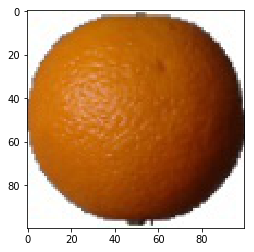

In [5]:
sample = 500
plt.imshow(X[sample])
print(fruits[Y[sample]])

In [8]:
# Let's confirm the number of classes :p
no_of_classes = len(np.unique(Y))
no_of_classes

3

In [9]:
print(Y[-1])
# target labels are numbers corresponding to class label. We need to change them to a vector of the elements.

2


In [10]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(Y,no_of_classes)
y_test = np_utils.to_categorical(y_test,no_of_classes)
y_train[0] # Note that only one element has value 1(corresponding to its label) and others are 0.

array([1., 0., 0.], dtype=float32)